<a href="https://colab.research.google.com/github/anuvarghese4/hds5210-2023/blob/main/final/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Final Project**

For my final project, I wanted to look into insurance companies' market share, particularly focusing on the operations of United Healthcare and Anthem Healthcare. My keen interest led me to explore the dynamics of Medicare and hospital health insurance, with a specific emphasis on the state Tennessee in USA. The project aimed on payment structures facilitated by insurance companies to hospitals, in the Tennessee region where both Anthem and United Healthcare hold prominence.

Moreover I am interested in  financial dynamics of healthcare costs, particularly focusing on the share borne by individuals and the contributions made by health insurance companies. The central goal was to identify opportunities for enhancing market share by devising more affordable healthcare scheme possibilities in market.

Data sources used -
Snowflake :
Antham Health care price transperancy data(CSV format) -  https://app.snowflake.com/marketplace/listing/GZTSZUEI44Y/payerset-llc-anthem-elevance-payer-price-transparency

United health care price transperancy data(CSV format) - https://app.snowflake.com/marketplace/listing/GZTSZUEI44Q/payerset-llc-united-healthcare-payer-pricing-transparency

CMS. gov

CMS Program Statistics - Medicare Part A & Part B - All Types of Service (Excel format) - https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/cms-program-statistics-medicare-part-a-part-b-all-types-of-service

CMS Program Statistics - Medicare Home Health Agency (Json format)- https://data.cms.gov/summary-statistics-on-use-and-payments/medicare-service-type-reports/cms-program-statistics-medicare-home-health-agency



The CMS Program Statistics - Medicare Part A & Part B - All Types of Service (Excel format) and CMS Program Statistics - Medicare Home Health Agency (Json format) are uploaded in the github repository - https://github.com/anuvarghese4/finals_datasets

In [4]:
%pip install "snowflake-connector-python[pandas]"

In [5]:
import snowflake.connector
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib

**Connection Setup:**

Am using the **snowflake.connector** module to connect to a Snowflake database.
The connection parameters include the username (*user*), password (*password*), account (*account*), database (*database*), schema (*schema*), and table (*table*) to which the connection is made.

**SQL Query:**

The variable *query2* stores an SQL query string. This query is a SELECT statement that retrieves *ANTHEM_SHARE* table in the *CUSTOMER_SHARE* schema of the specified database.

**Data Retrieval:**

The **pd.read_sql_query** function from the Pandas library is used to execute the SQL query (*query2*) on the Snowflake database using the established connection (*con*).

The result of the query is stored in the variable anthem_data.

In [6]:
# Creating Connection object to connect with snow flakes database
con = snowflake.connector.connect(
    user='avarghese4',
    password='Application@2023',
    account='ucoecis-yj57058',
    database='ANTHEM__ELEVANCE__PAYER_PRICE_TRANSPARENCY',
    schema='CUSTOMER_SHARE',
    table="ANTHEM_SHARE",
)

# Query to run on snowflakes database to extract relavent data
query2 = '''
  SELECT * FROM CUSTOMER_SHARE.ANTHEM_SHARE;
'''

# Fetching the data from the database using query and connection objects
anthem_data = pd.read_sql_query(query2, con)

<ipython-input-6-8217a9f9a3dd>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  anthem_data = pd.read_sql_query(query2, con)


In [7]:
anthem_data.head()

,BILLING_CODE,BILLING_CODE_TYPE,BILLING_CODE_TYPE_VERSION,DESCRIPTION,NAME,ADDITIONAL_INFORMATION,BILLING_CLASS,EXPIRATION_DATE,NEGOTIATED_RATE,NEGOTIATED_TYPE,...,NPI,TIN_TYPE,TIN_VALUE,ORGANIZATION NAME,PROVIDER TYPE TEXT,STATE,CITY,DOING BUSINESS AS NAME,ENROLLMENT ID,ENROLLMENT STATE
0,0771,RC,2023,PREVENTIVE CARE SERVICES/VACCINE ADMINISTRATION,PREVENTIVE CARE SERVICES/VACCINE ADMINISTRATION,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
1,0771,RC,2023,Vaccine Administration,Vaccine Administration,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
2,0771,RC,2023,Vaccine Administration,Vaccine Administration,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
3,0771,RC,2023,Vaccine Administration,Vaccine Administration,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
4,0771,RC,2023,Vaccine Administration,Vaccine Administration,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN


In [8]:
anthem_data.columns

Index(['BILLING_CODE', 'BILLING_CODE_TYPE', 'BILLING_CODE_TYPE_VERSION',
       'DESCRIPTION', 'NAME', 'ADDITIONAL_INFORMATION', 'BILLING_CLASS',
       'EXPIRATION_DATE', 'NEGOTIATED_RATE', 'NEGOTIATED_TYPE',
       'NEGOTIATION_ARRANGEMENT', 'RATE_PROVIDER_KEY', 'SERVICE_CODES', 'NPI',
       'TIN_TYPE', 'TIN_VALUE', 'ORGANIZATION NAME', 'PROVIDER TYPE TEXT',
       'STATE', 'CITY', 'DOING BUSINESS AS NAME', 'ENROLLMENT ID',
       'ENROLLMENT STATE'],
      dtype='object')

**Removing Duplicate Rows:**

Am using the ***drop_duplicates*** method *anthem_data* DataFrame with the
**keep="last"** argument to keep the last occurrence of a duplicates and using the **inplace=True** parameter to modify the DataFrame directly without the need to create a new DataFrame.

In [9]:
# Deleting the duplicates from the data and keep their last occurence
anthem_data.drop_duplicates(keep="last", inplace=True)
anthem_data.head()

,BILLING_CODE,BILLING_CODE_TYPE,BILLING_CODE_TYPE_VERSION,DESCRIPTION,NAME,ADDITIONAL_INFORMATION,BILLING_CLASS,EXPIRATION_DATE,NEGOTIATED_RATE,NEGOTIATED_TYPE,...,NPI,TIN_TYPE,TIN_VALUE,ORGANIZATION NAME,PROVIDER TYPE TEXT,STATE,CITY,DOING BUSINESS AS NAME,ENROLLMENT ID,ENROLLMENT STATE
0,0771,RC,2023,PREVENTIVE CARE SERVICES/VACCINE ADMINISTRATION,PREVENTIVE CARE SERVICES/VACCINE ADMINISTRATION,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
5,0771,RC,2023,PREVENTIVE CARE SERVICES - VACCINE ADMINISTRATION,PREVENTIVE CARE SERVICE,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
6,0771,RC,2023,Vaccine Administration,Vaccine Administration,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,618.03,fee schedule,...,1538164090,ein,31-1626179,"UNIVERSITY HEALTH SYSTEM, INC.",PART A PROVIDER - HOSPITAL,None,None,UNIVERSITY OF TENNESSEE MEDICAL CENTER,O20080514000538,TN
7,0945,RC,2023,OTHER THERAPEUTIC SERVICES/ALCOHOL REHABILITATION,OTHER THERAPEUTIC SERVICES/ALCOHOL REHABILITATION,Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,79.27,fee schedule,...,1093705428,ein,62-6010402,JACKSON MADISON COUNTY GENERAL HOSPITAL,PART A PROVIDER - HOSPITAL,TN,JACKSON,JACKSON MADISON COUNTY GENERAL HOSPITAL,O20080612000712,TN
9,0945,RC,2022,"Other Therapeutic Services (also see 095x, ext...","Other Therapeutic Services (also see 095x, ext...",Outpatient Services BCBST BASE FEE SCHEDULE - ...,institutional,9999-12-31,79.27,fee schedule,...,1093705428,ein,62-6010402,JACKSON MADISON COUNTY GENERAL HOSPITAL,PART A PROVIDER - HOSPITAL,TN,JACKSON,JACKSON MADISON COUNTY GENERAL HOSPITAL,O20080612000712,TN


Filtering the data using **loc** function and then grouping by the filtered dataframe by the *ORGANIZATION NAME* using the ***groupby*** method, then applying **mean()** method to each group. So this is an aggregation step, where data from different rows with the same *ORGANIZATION NAME* is combined by taking the mean.

In [10]:
# Data Aggregation on required columns using groupby() with mean() method.
anthem_groupedBy_data = anthem_data.loc[anthem_data["STATE"] == "TN", :].groupby(["ORGANIZATION NAME"]).mean().reset_index()

<ipython-input-10-1b0bc85b3f30>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  anthem_groupedBy_data = anthem_data.loc[anthem_data["STATE"] == "TN", :].groupby(["ORGANIZATION NAME"]).mean().reset_index()


In [11]:
anthem_groupedBy_data.head()

,ORGANIZATION NAME,NEGOTIATED_RATE
0,"AMISUB (SFH), INC.",1040.419527
1,ATHENS REGIONAL MEDICAL CENTER LLC,2410.381421
2,BAPTIST MEMORIAL HOSPITAL,1368.932074
3,BAPTIST MEMORIAL HOSPITAL -UNION CITY INC,1941.030765
4,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,1866.968760


**Connection Setup:**

Am using the **snowflake.connector** module to connect to a Snowflake database.
The connection parameters include the username (*user*), password (*password*), account (*account*), database (*database*), schema (*schema*), and table (*table*) to which the connection is made.

**SQL Query:**

The variable *query3* stores an SQL query string. This query is a SELECT statement that retrieves *UNITED_HEALTHCARE_SHARE* table in the *CUSTOMER_SHARE* schema of the specified database.

**Data Retrieval:**

The **pd.read_sql_query** function from the Pandas library is used to execute the SQL query (*query3*) on the Snowflake database using the established connection (*con*).

The result of the query is stored in the variable anthem_data.

In [12]:
# Creating Connection object to connect with snow flakes database
con = snowflake.connector.connect(
    user='avarghese4',
    password='Application@2023',
    account='ucoecis-yj57058',
    database='UNITED_HEALTHCARE__PAYER_PRICING_TRANSPARENCY',
    schema='CUSTOMER_SHARE',
    table="UNITED_HEALTHCARE_SHARE",
)

# Query to run on snowflakes database to extract relavent data
query3 = '''
  SELECT * FROM CUSTOMER_SHARE.UNITED_HEALTHCARE_SHARE;
'''

# Fetching the data from the database using query and connection objects
united_data = pd.read_sql(query3, con)

<ipython-input-12-4a57eb8881ee>:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  united_data = pd.read_sql(query3, con)


Using the **astype** method to convert the data type of the *ENROLLMENT ID* column to a string. Using apply method to apply a hashing function to each value in the *ENROLLMENT ID* column. The function **hash_enrollment_id** takes a enrollment id as parameter and hashes it using the *SHA-256* algorithm from the **hashlib** module, and returns the hexadecimal digest of the hash.

Used the resource below to implement this requirement: https://towardsdatascience.com/anonymise-sensitive-data-in-a-pandas-dataframe-column-with-hashlib-8e7ef397d91f


In [13]:
united_data['ENROLLMENT ID'] = united_data['ENROLLMENT ID'].astype(str)

def hash_enrollment_id(x):
    return hashlib.sha256(x.encode()).hexdigest()

united_data['ENROLLMENT ID'] = united_data['ENROLLMENT ID'].apply(hash_enrollment_id)

In [14]:
united_data.head()

,BILLING_CODE,BILLING_CODE_TYPE,BILLING_CODE_TYPE_VERSION,DESCRIPTION,NAME,ADDITIONAL_INFORMATION,BILLING_CLASS,EXPIRATION_DATE,NEGOTIATED_RATE,NEGOTIATED_TYPE,...,NPI,TIN_TYPE,TIN_VALUE,ORGANIZATION NAME,PROVIDER TYPE TEXT,STATE,CITY,DOING BUSINESS AS NAME,ENROLLMENT ID,ENROLLMENT STATE
0,15771,CPT,2022,Grafting of autologous fat harvested by liposu...,GRAFTING OF AUTOLOGOUS FAT BY LIPO 50 CC OR LESS,None,professional,9999-12-31,998.21,negotiated,...,1487663506,ein,430652656,MISSOURI BAPTIST MEDICAL CENTER,PART A PROVIDER - HOSPITAL,MO,SAINT LOUIS,MISSOURI BAPTIST MEDICAL CENTER,06800f45fdc003f1b78b93d1d87c944e6571dca9717a75...,MO
1,36558,CPT,2022,Insertion of tunneled centrally inserted centr...,INSJ TUNNELED CVC W/O SUBQ PORT/PMP AGE 5 YR/>,None,professional,9999-12-31,2506.97,negotiated,...,1134186315,ein,474000401,RHN CLARK MEMORIAL HOSPITAL LLC,PART A PROVIDER - HOSPITAL,IN,JEFFERSONVILLE,CLARK MEMORIAL HEALTH,85f222e1a64a9b7e1ab8531ad65bfa79d61317b07bd663...,IN
2,36476,CPT,2022,Endovenous ablation therapy of incompetent vei...,ENDOVEN ABLTJ INCMPTNT VEIN XTR RF 2ND+ VEINS,None,professional,9999-12-31,468.14,negotiated,...,1033201793,ein,420680452,CENTRAL IOWA HOSPITAL CORPORATION,PART A PROVIDER - HOSPITAL,IA,DES MOINES,IOWA METHODIST MEDICAL CENTER,0cbae782ae9a6a6e8c130d1ed186cd50af6c9342e880b1...,IA
3,37760,CPT,2022,"Ligation of perforator veins, subfascial, radi...",LIG PRFRATR VEIN SUBFSCAL RAD INCL SKN GRF 1 LEG,None,professional,9999-12-31,775.11,negotiated,...,1740222009,ein,340714538,AULTMAN HOSPITAL,PART A PROVIDER - HOSPITAL,OH,CANTON,AULTMAN REHABILITATION CENTER,0a52b13eb807919ea332985bd2e7a4d7cfaf952a0c2756...,OH
4,81264,CPT,2022,IGK@ (Immunoglobulin kappa light chain locus) ...,IGK@ GENE REARRANGE DETECT ABNORMAL CLONAL POP,None,professional,9999-12-31,129.99,negotiated,...,1821017880,ein,460227855,SANFORD MEDICAL CENTER,PART A PROVIDER - HOSPITAL,SD,SIOUX FALLS,None,fa0e03692a63a543450fc8b18e86a8351e1e7d8b4a0232...,SD


In [15]:
united_data.columns

Index(['BILLING_CODE', 'BILLING_CODE_TYPE', 'BILLING_CODE_TYPE_VERSION',
       'DESCRIPTION', 'NAME', 'ADDITIONAL_INFORMATION', 'BILLING_CLASS',
       'EXPIRATION_DATE', 'NEGOTIATED_RATE', 'NEGOTIATED_TYPE',
       'NEGOTIATION_ARRANGEMENT', 'RATE_PROVIDER_KEY', 'SERVICE_CODES', 'NPI',
       'TIN_TYPE', 'TIN_VALUE', 'ORGANIZATION NAME', 'PROVIDER TYPE TEXT',
       'STATE', 'CITY', 'DOING BUSINESS AS NAME', 'ENROLLMENT ID',
       'ENROLLMENT STATE'],
      dtype='object')

Filtering the data using **loc** function to get the row specific to *Tennesse State* and then grouping by the filtered dataframe by the *ORGANIZATION NAME* using the ***groupby*** method, then applying **mean()** method to each group. So this is an aggregation step, where data from different rows with the same *ORGANIZATION NAME* is combined by taking the mean.

In [16]:
# Data Aggregation on required columns using groupby() with mean() method.
united_groupedBy_data = united_data.loc[united_data["STATE"] == "TN", :].groupby(["ORGANIZATION NAME"]).mean().reset_index()

<ipython-input-16-0a9381651bfa>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  united_groupedBy_data = united_data.loc[united_data["STATE"] == "TN", :].groupby(["ORGANIZATION NAME"]).mean().reset_index()


In [17]:
united_groupedBy_data.head()

,ORGANIZATION NAME,NEGOTIATED_RATE
0,"AMISUB (SFH), INC.",883.970000
1,ATHENS REGIONAL MEDICAL CENTER LLC,377.093333
2,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,359.796667
3,"BEHAVIORAL HEALTHCARE CENTER AT CLARKSVILLE, LLC",341.710000
4,CENTRAL TENNESSEE HOSPITAL CORPORATION,309.850000


**Merging DataFrames:**

Used **merge()** from pandas function to combine the two DataFrames based on a common column *ORGANIZATION NAME*. The DataFrames *anthem_groupedBy_data* and *united_groupedBy_data* are merged using the common column specified by the on parameter. The result of the merge operation is assigned to a new DataFrame called *merged_data_anthem_united*

In [18]:
# Merging the data on the relavent column using merge() method.
merged_data_anthem_united = pd.merge(anthem_groupedBy_data, united_groupedBy_data, on = 'ORGANIZATION NAME')
merged_data_anthem_united

,ORGANIZATION NAME,NEGOTIATED_RATE_x,NEGOTIATED_RATE_y
0,"AMISUB (SFH), INC.",1040.419527,883.970000
1,ATHENS REGIONAL MEDICAL CENTER LLC,2410.381421,377.093333
2,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,1866.968760,359.796667
3,CENTRAL TENNESSEE HOSPITAL CORPORATION,1117.551789,309.850000
4,CHATTANOOGA HAMILTON COUNTY HOSPITAL AUTHORITY,1352.789895,204.780000
5,CLAIBORNE MEDICAL CENTER,2368.627264,926.050000
6,CROCKETT HOSPITAL LLC,1780.870968,829.990000
7,EAST TENNESSEE CHILDREN'S HOSPITAL ASSOCIATION...,2942.356423,341.010000
8,FORT LOUDOUN MEDICAL CENTER,2273.729546,4323.380000
9,HARDIN COUNTY GENERAL HOSPITAL,744.186354,123.150000


Renaming specific columns using **rename()** method on the merged_data_anthem_united DataFrame, providing more meaningful and distinguishable names for the columns related to negotiated rates with Anthem and United. The renaming is done in-place, that is it modifies existing DataFrame rather than creating a new one.

In [19]:
# Renaming the columns after merging to a relavent name.
merged_data_anthem_united.rename({"NEGOTIATED_RATE_x" : "NEGOTIATED_RATE_ANTHEM", "NEGOTIATED_RATE_y" : "NEGOTIATED_RATE_UNITED"}, axis="columns", inplace=True)
merged_data_anthem_united

,ORGANIZATION NAME,NEGOTIATED_RATE_ANTHEM,NEGOTIATED_RATE_UNITED
0,"AMISUB (SFH), INC.",1040.419527,883.970000
1,ATHENS REGIONAL MEDICAL CENTER LLC,2410.381421,377.093333
2,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,1866.968760,359.796667
3,CENTRAL TENNESSEE HOSPITAL CORPORATION,1117.551789,309.850000
4,CHATTANOOGA HAMILTON COUNTY HOSPITAL AUTHORITY,1352.789895,204.780000
5,CLAIBORNE MEDICAL CENTER,2368.627264,926.050000
6,CROCKETT HOSPITAL LLC,1780.870968,829.990000
7,EAST TENNESSEE CHILDREN'S HOSPITAL ASSOCIATION...,2942.356423,341.010000
8,FORT LOUDOUN MEDICAL CENTER,2273.729546,4323.380000
9,HARDIN COUNTY GENERAL HOSPITAL,744.186354,123.150000


**Pivot Table Creation:**

Used **pivot_table()** function to create a pivot table from the DataFrame merged_data_anthem_united.
The values to be aggregated are specified as ['NEGOTIATED_RATE_ANTHEM', 'NEGOTIATED_RATE_UNITED'].
Used column 'ORGANIZATION NAME', to keep the unique values in the "ORGANIZATION NAME" column as the columns of the pivot table.

**Aggregation:**
The values parameter ('NEGOTIATED_RATE_ANTHEM', 'NEGOTIATED_RATE_UNITED') will be aggregated within the pivot table.

In [20]:
# Pivoting the merged table from above.
tenneesse_Insurance_data = pd.pivot_table(merged_data_anthem_united, values=['NEGOTIATED_RATE_ANTHEM', 'NEGOTIATED_RATE_UNITED'], columns='ORGANIZATION NAME')

# Print the pivot table
tenneesse_Insurance_data

ORGANIZATION NAME,"AMISUB (SFH), INC.",ATHENS REGIONAL MEDICAL CENTER LLC,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,CENTRAL TENNESSEE HOSPITAL CORPORATION,CHATTANOOGA HAMILTON COUNTY HOSPITAL AUTHORITY,CLAIBORNE MEDICAL CENTER,CROCKETT HOSPITAL LLC,"EAST TENNESSEE CHILDREN'S HOSPITAL ASSOCIATION, INC.",FORT LOUDOUN MEDICAL CENTER,HARDIN COUNTY GENERAL HOSPITAL,...,HILLSIDE HOSPITAL LLC,HTI MEMORIAL HOSPITAL CORPORATION,JACKSON MADISON COUNTY GENERAL HOSPITAL,LECONTE MEDICAL CENTER,"MILAN GENERAL HOSPITAL, INC.",PARKWEST MEDICAL CENTER,"SAINT FRANCIS HOSPITAL - BARTLETT, INC.",SAINT THOMAS HIGHLANDS HOSPITAL LLC,TRUSTPOINT HOSPITAL LLC,VANDERBILT UNIVERSITY MEDICAL CENTER
NEGOTIATED_RATE_ANTHEM,1040.419527,2410.381421,1866.968760,1117.551789,1352.789895,2368.627264,1780.870968,2942.356423,2273.729546,744.186354,...,2436.583942,1758.713222,1452.192122,2567.668824,1978.026314,1784.900665,912.828835,1749.569012,509.873949,1613.037596
NEGOTIATED_RATE_UNITED,883.970000,377.093333,359.796667,309.850000,204.780000,926.050000,829.990000,341.010000,4323.380000,123.150000,...,548.340000,368.700000,76.120000,3022.580000,46.165000,371.890000,49090.560000,495.230000,899.560000,582.410000


Added a new column *'Total'* to the pivot table created in the step before this to compute the Total Negotiation rate for both Anthem and United Insurance Companies using the **sum() method** from pandas.

In [21]:
# Calculate the total for each insurance company
tenneesse_Insurance_data['Total'] = tenneesse_Insurance_data.sum(axis=1)
tenneesse_Insurance_data

ORGANIZATION NAME,"AMISUB (SFH), INC.",ATHENS REGIONAL MEDICAL CENTER LLC,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,CENTRAL TENNESSEE HOSPITAL CORPORATION,CHATTANOOGA HAMILTON COUNTY HOSPITAL AUTHORITY,CLAIBORNE MEDICAL CENTER,CROCKETT HOSPITAL LLC,"EAST TENNESSEE CHILDREN'S HOSPITAL ASSOCIATION, INC.",FORT LOUDOUN MEDICAL CENTER,HARDIN COUNTY GENERAL HOSPITAL,...,HTI MEMORIAL HOSPITAL CORPORATION,JACKSON MADISON COUNTY GENERAL HOSPITAL,LECONTE MEDICAL CENTER,"MILAN GENERAL HOSPITAL, INC.",PARKWEST MEDICAL CENTER,"SAINT FRANCIS HOSPITAL - BARTLETT, INC.",SAINT THOMAS HIGHLANDS HOSPITAL LLC,TRUSTPOINT HOSPITAL LLC,VANDERBILT UNIVERSITY MEDICAL CENTER,Total
NEGOTIATED_RATE_ANTHEM,1040.419527,2410.381421,1866.968760,1117.551789,1352.789895,2368.627264,1780.870968,2942.356423,2273.729546,744.186354,...,1758.713222,1452.192122,2567.668824,1978.026314,1784.900665,912.828835,1749.569012,509.873949,1613.037596,37364.647954
NEGOTIATED_RATE_UNITED,883.970000,377.093333,359.796667,309.850000,204.780000,926.050000,829.990000,341.010000,4323.380000,123.150000,...,368.700000,76.120000,3022.580000,46.165000,371.890000,49090.560000,495.230000,899.560000,582.410000,64784.615000


**Sorting the DataFrame:**

Used **sort_values method** to on the DataFrame tenneesse_Insurance_data with
the **by**='Total' parameter specifing that the sorting should be based on the values in the 'Total' column.
The **ascending=False** parameter indicates that the sorting should be in descending order.


**New DataFrame Creation:**

The result of the sorting operation is assigned to a new DataFrame called *pivot_table_sorted*.

In [22]:
# Sort the pivot table by the 'Total' column in descending order
pivot_table_sorted = tenneesse_Insurance_data.sort_values(by='Total', ascending=False)

# Extract 'Organization Name' and 'Total' columns
organization_total_data = pivot_table_sorted[['Total']]

organization_total_data

ORGANIZATION NAME,Total
NEGOTIATED_RATE_UNITED,64784.615000
NEGOTIATED_RATE_ANTHEM,37364.647954


**Pie Chart Creation:**

Used **pie()** method from matplotlib library on the organization_total_data DataFrame.

The ***y='Total'*** parameter specifies that the values from the *'Total'* column should be used for the pie chart.

The ***autopct='%1.1f%%'*** parameter adds percentage labels to each wedge of the pie chart, displaying one decimal place.

The ***startangle=90*** parameter specifies the starting angle of the pie chart as 90 degrees (i.e., the first wedge starts from the vertical position).

**Styling and Configuration:**

The **legend=False** parameter indicates that the chart should not display a legend.The colors parameter specifies the colors for each wedge in the pie chart. In this case, 'skyblue' and 'lightcoral' are used.

**Title Setting:**

The **plt.title**() sets the title of the pie chart to 'Total Negotiated Rates Distribution'

Text(0.5, 1.0, 'Total Negotiated Rates Distribution')

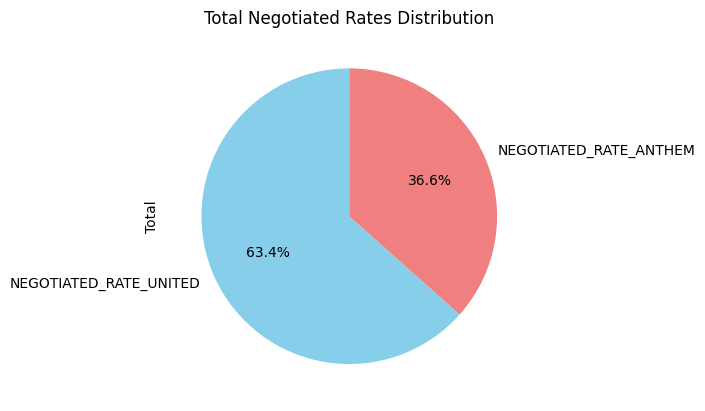

In [23]:
# Visualising throught pie chart.
organization_total_data.plot.pie(y='Total', autopct='%1.1f%%', startangle=90, legend=False, colors=['skyblue', 'lightcoral'])
plt.title('Total Negotiated Rates Distribution')

**Pie Chart**

The Distribution of Negotiation Rates between Anthem Healthcare and United Healthcare.

In the chart, Anthem Healthcare reflects a negotiation rate of 36.6%, while United Healthcare boasts a higher rate of 63.4%. This suggests that United Healthcare is perceived as more flexible and accessible from a customer standpoint, showcasing a substantial portion of negotiations in favor of customers. Pie Chart

---


---




In [24]:
merged_data_anthem_united.head()

,ORGANIZATION NAME,NEGOTIATED_RATE_ANTHEM,NEGOTIATED_RATE_UNITED
0,"AMISUB (SFH), INC.",1040.419527,883.970000
1,ATHENS REGIONAL MEDICAL CENTER LLC,2410.381421,377.093333
2,BAPTIST MEMORIAL HOSPITAL-HUNTINGDON,1866.968760,359.796667
3,CENTRAL TENNESSEE HOSPITAL CORPORATION,1117.551789,309.850000
4,CHATTANOOGA HAMILTON COUNTY HOSPITAL AUTHORITY,1352.789895,204.780000


Plotting a line plot here following are the steps -

**Setting Figure Size :**

The ***plt.figure(figsize=(20, 6))*** line sets the size of the figure to be created, making it 20 units wide and 6 units high.

**Line Plot Creation :**

Two line plots are created using Seaborn's **lineplot function**.
The *x-axis* is specified as *'ORGANIZATION NAME'*, and the *y-axis* is specified as *'NEGOTIATED_RATE_ANTHEM'* and *'NEGOTIATED_RATE_UNITED'* for the *'ANTHEM'* and *'UNITED'* organizations, respectively.
The data parameter is set to the merged_data_anthem_united DataFrame.
The label parameter is used to label each line, and a legend is added later.

**Axis Labels :**

**plt.xlabel()** and **plt.ylabel()** set labels for the x-axis and y-axis, respectively.

**Title Setting :**

plt.title() sets the title of the plot.

**X-axis Tick Rotation :**

plt.xticks(rotation="vertical") rotates the x-axis labels vertically for better readability.

**Legend :**

plt.legend() adds a legend to the plot, displaying labels for the two lines.

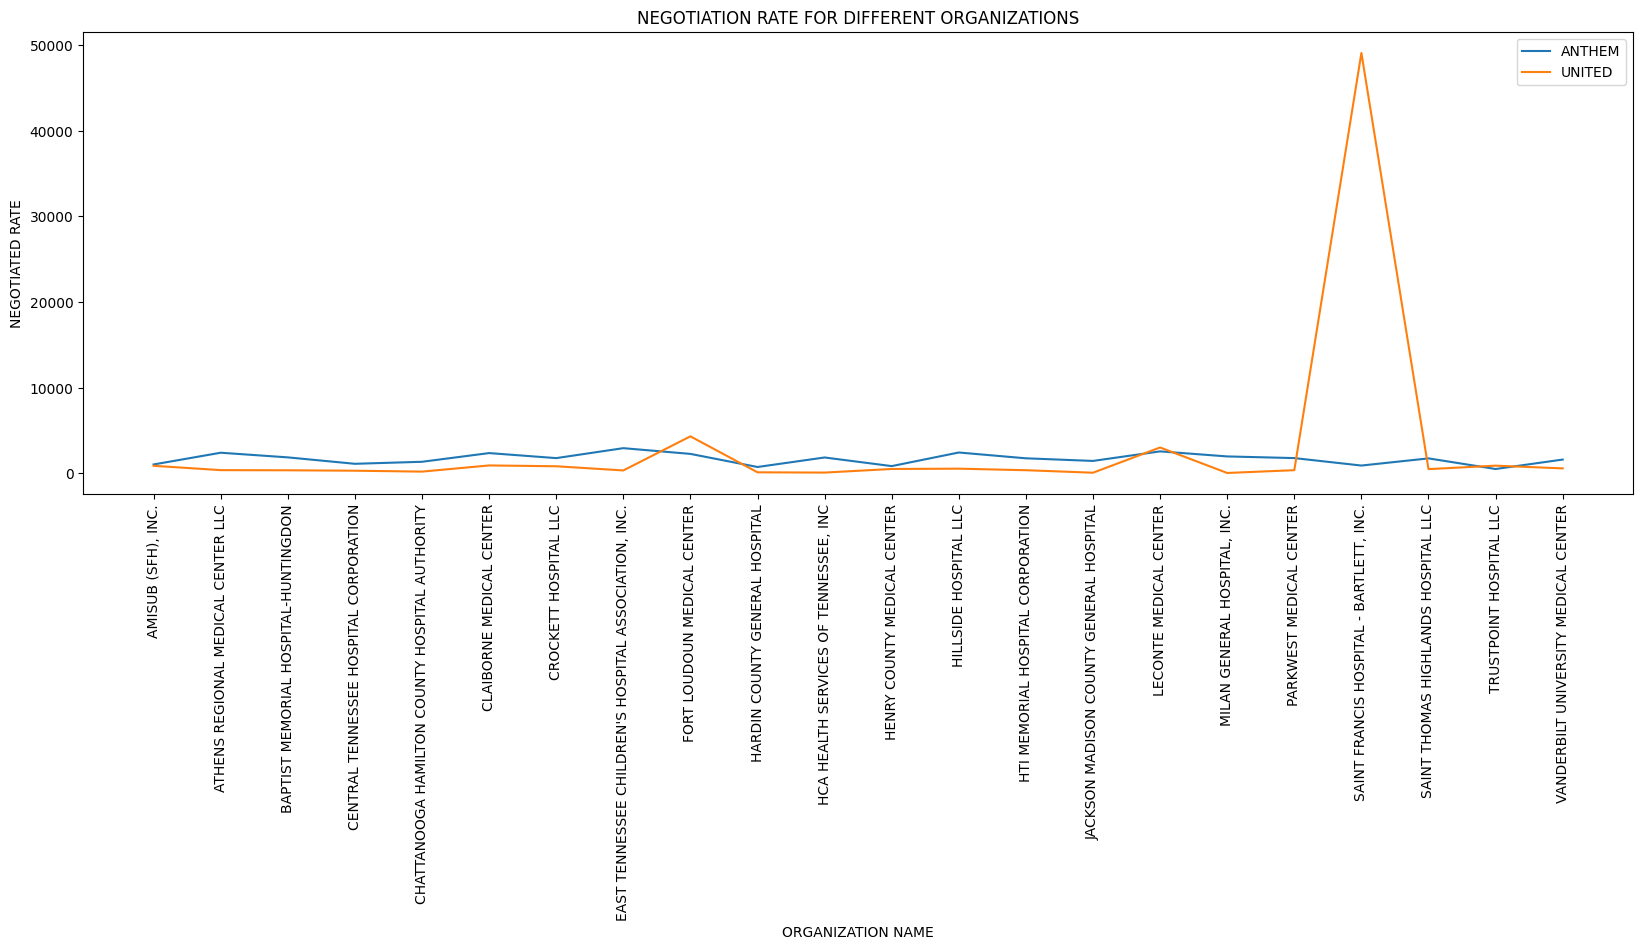

In [25]:
# Visualizing through line graph
plt.figure(figsize=(20, 6))
sns.lineplot(x='ORGANIZATION NAME', y='NEGOTIATED_RATE_ANTHEM', data=merged_data_anthem_united, label='ANTHEM')
sns.lineplot(x='ORGANIZATION NAME', y='NEGOTIATED_RATE_UNITED', data=merged_data_anthem_united, label='UNITED')
plt.xlabel('ORGANIZATION NAME')
plt.ylabel('NEGOTIATED RATE')
plt.title('NEGOTIATION RATE FOR DIFFERENT ORGANIZATIONS')
plt.xticks(rotation="vertical")
plt.legend()

**Line Graph**

In the line graph we have done a comparative between Anthem and united health care among the hospitals in tennessee where we could notice that united is below Anthem in most case- however, in case of *FORT LOUDOUN MEDICAL CENTER, LECONTE MEDICAL CENTER, SAINT FRANCIS HOSPITAL - BARTLETT, INC and  TRUSTPOINT HOSPITAL LLC.* we can notice a  hike over Anthem which indicates the special strength of a specific hospital or the market share .

One of the most noticeable things is that in *SAINT FRANCIS HOSPITAL - BARTLETT, INC* the united health care have contributed more five  times of the  average . which specifically indicates the peculiarity and strength in that hospitals healthcare share



---



---



Fetching the data hosted on a git repository

**Data Retrieval:**
The variable url contains the URL of a JSON file.
Used **pd.read_json(url)** to read the JSON data from the specified URL into a Pandas DataFrame.

**Handling Missing Values:**

Used **dropna()** to remove any rows containing missing values (*NaN*) from the DataFrame.

**Header Extraction:**

Used **iloc[0, :]** to extract the first row of the DataFrame as the header.

**Data Reorganization:**

**pd.DataFrame**(mdcr_HHA.values[1:], columns=header) creates a new DataFrame (*mdcr_HHA*) by excluding the first row (which now serves as the header) and using the extracted header for column names.

In [26]:
# FETCHING DATA FROM HOSTED SOURCE
url = "https://raw.githubusercontent.com/anuvarghese4/finals_datasets/main/MDCR_HHA_3.json"
mdcr_HHA = pd.read_json(url)
mdcr_HHA = mdcr_HHA.dropna()
header = mdcr_HHA.iloc[0, :]
mdcr_HHA  = pd.DataFrame(mdcr_HHA.values[1:], columns=header)
mdcr_HHA.columns.name = None
mdcr_HHA.head()

,Area of Residence,Total Original Medicare Enrollees,Total Persons With Utilization,Total Service Visits,Service Visits Per Person With Utilization,"Service Visits Per 1,000 Original Medicare Enrollees",Total Episodes¹,Service Visits Per Episode,Episodes Per Person With Utilization,"Episodes Per 1,000 Original Medicare Enrollees",Total Program Payments,Program Payments Per Service Visit,Program Payments Per Episode,Program Payments Per Person With Utilization,Program Payments Per Original Medicare Enrollee
0,All Areas,36356380.0,3018466.0,76785088.0,25.44,2112.0,9279712.0,8.27,3.07,255.0,16872834558.0,220.0,1818.0,5590.0,464.0
1,United States,35681342.0,3012151.0,76622816.0,25.44,2147.0,9260624.0,8.27,3.07,260.0,16848282827.0,220.0,1819.0,5593.0,472.0
2,Alabama,528983.0,57316.0,1513703.0,26.41,2862.0,199137.0,7.6,3.47,376.0,284632644.0,188.0,1429.0,4966.0,538.0
3,Alaska,105831.0,3519.0,75648.0,21.5,715.0,9508.0,7.96,2.7,90.0,20306284.0,268.0,2136.0,5770.0,192.0
4,Arizona,767513.0,45433.0,935153.0,20.58,1218.0,118657.0,7.88,2.61,155.0,215004018.0,230.0,1812.0,4732.0,280.0


Converting the numerical Columns to *int64* data type using **astype() method**

In [27]:
# Type casting the columns to integer type.
for i in mdcr_HHA.columns[1:]:
  mdcr_HHA[i] = mdcr_HHA[i].astype(int)
mdcr_HHA.dtypes

Area of Residence                                       object
Total Original Medicare Enrollees                        int64
Total Persons With Utilization                           int64
Total Service Visits                                     int64
Service Visits Per Person With Utilization               int64
Service Visits Per 1,000 Original Medicare Enrollees     int64
Total Episodes¹                                          int64
Service Visits Per Episode                               int64
Episodes Per Person With Utilization                     int64
Episodes Per 1,000 Original Medicare Enrollees           int64
Total Program Payments                                   int64
Program Payments Per Service Visit                       int64
Program Payments Per Episode                             int64
Program Payments Per Person With Utilization             int64
Program Payments Per Original Medicare Enrollee          int64
dtype: object

Fetching the data hosted on a git repository

**Data Retrieval:**

The variable url contains the URL of a CSV file.
**pd.read_csv(url)** is used to read the CSV data from the specified URL into a Pandas DataFrame named mdcr_summary_AB.

**Column Dropping:**

Using **drop(**columns=mdcr_summary_AB.columns[0]) dropped the first column of the DataFrame.

**Row Dropping:**

Used **drop(**mdcr_summary_AB.index[-1]) dropped the last row of the DataFrame.

In [28]:
# FETCHING DATA FROM HOSTED SOURCE
url = "https://raw.githubusercontent.com/anuvarghese4/finals_datasets/main/MDCR_SUMMARY_AB_2021.csv"
mdcr_summary_AB = pd.read_csv(url)
mdcr_summary_AB = mdcr_summary_AB.drop(columns=mdcr_summary_AB.columns[0])
mdcr_summary_AB = mdcr_summary_AB.drop(mdcr_summary_AB.index[-1])
mdcr_summary_AB.head()

,Area of Residence,Total Original Medicare Part A and/or Part B Enrollees,Total Medicare Part A and/or Part B Persons With Utilization,Total Medicare Part A and/or Part B Program Payments,Medicare Part A and/or Part B Program Payments Per Person With Utilization,Medicare Part A and/or Part B Program Payments Per Original Medicare Enrollee,Total Original Medicare Part A Enrollees,Total Medicare Part A Persons With Utilization,Total Medicare Part A Program Payments,Medicare Part A Program Payments Per Person With Utilization,Medicare Part A Program Payments Per Original Medicare Enrollee,Total Original Medicare Part B Enrollees,Total Medicare Part B Persons With Utilization,Total Medicare Part B Program Payments,Medicare Part B Program Payments Per Person With Utilization,Medicare Part B Program Payments Per Original Medicare Enrollee,Total Beneficiary Cost Sharing,Beneficiary Cost Sharing Per Person With Utilization,Beneficiary Cost Sharing Per Original Medicare Enrollee,Discharged Dead
0,All Areas,36356380,33295595,396122195621,11897,10896,36051507,6655772,187713142803,28203,5207,30842701,32679847,208409052818,6377,6757,64282111309,1931,1768,1693338
1,United States,35681342,33193839,395342489207,11910,11080,35377335,6627749,187231365080,28250,5292,30726771,32592838,208111124126,6385,6773,64168853122,1933,1798,1684655
2,Alabama,528983,512627,5653598984,11029,10688,522820,116144,2684356995,23112,5134,456357,499789,2969241988,5941,6506,904156197,1764,1709,32352
3,Alaska,105831,90717,1051813241,11594,9939,105399,13055,467738024,35828,4438,93234,89885,584075217,6498,6265,170015088,1874,1606,2301
4,Arizona,767513,720762,7745898078,10747,10092,757650,135153,3352520020,24805,4425,662898,703776,4393378059,6243,6628,1264524931,1754,1648,38995


Dropping all the *NULL* values in the dataframe mdcr_summary_AB using **dropna() method**

In [29]:
# Droping the null values from the dataFrame
mdcr_summary_AB.dropna(inplace=True)

Converting the numerical Columns to *int64* data type using **astype()** method

In [30]:
# Type casting the columns to integer type.
for i in mdcr_summary_AB.columns[1:]:
  mdcr_summary_AB[i] = mdcr_summary_AB[i].astype(int)

Checking the information of the *mdcr_summary_AB* using **info() method**

In [31]:
mdcr_summary_AB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 20 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Area of Residence                                                              59 non-null     object
 1   Total Original Medicare Part A and/or Part B Enrollees                         59 non-null     int64 
 2   Total Medicare Part A and/or Part B Persons With Utilization                   59 non-null     int64 
 3   Total Medicare Part A and/or Part B Program Payments                           59 non-null     int64 
 4   Medicare Part A and/or Part B Program Payments Per Person With Utilization     59 non-null     int64 
 5   Medicare Part A and/or Part B Program Payments Per Original Medicare Enrollee  59 non-null     int64 
 6   Total Original Medicare Part A Enrol

Checking the Correlation between the columns using **corr() method** of mdcr_summary_AB to check weather any of the columns are correlating to run *regression analysis* later to predict one attribute using other

In [32]:
mdcr_summary_AB.corr(numeric_only=True)

,Total Original Medicare Part A and/or Part B Enrollees,Total Medicare Part A and/or Part B Persons With Utilization,Total Medicare Part A and/or Part B Program Payments,Medicare Part A and/or Part B Program Payments Per Person With Utilization,Medicare Part A and/or Part B Program Payments Per Original Medicare Enrollee,Total Original Medicare Part A Enrollees,Total Medicare Part A Persons With Utilization,Total Medicare Part A Program Payments,Medicare Part A Program Payments Per Person With Utilization,Medicare Part A Program Payments Per Original Medicare Enrollee,Total Original Medicare Part B Enrollees,Total Medicare Part B Persons With Utilization,Total Medicare Part B Program Payments,Medicare Part B Program Payments Per Person With Utilization,Medicare Part B Program Payments Per Original Medicare Enrollee,Total Beneficiary Cost Sharing,Beneficiary Cost Sharing Per Person With Utilization,Beneficiary Cost Sharing Per Original Medicare Enrollee,Discharged Dead
Total Original Medicare Part A and/or Part B Enrollees,1.000000,0.999902,0.999777,0.151320,0.132372,0.999998,0.999831,0.999642,0.066826,0.145235,0.999923,0.999898,0.999831,0.125165,0.128046,0.999860,0.080007,0.081428,0.999686
Total Medicare Part A and/or Part B Persons With Utilization,0.999902,1.000000,0.999808,0.153840,0.138427,0.999906,0.999942,0.999638,0.063450,0.150191,0.999993,1.000000,0.999893,0.130032,0.134776,0.999947,0.085795,0.088719,0.999816
Total Medicare Part A and/or Part B Program Payments,0.999777,0.999808,1.000000,0.165034,0.144498,0.999757,0.999794,0.999960,0.074392,0.158334,0.999833,0.999801,0.999968,0.137903,0.140539,0.999914,0.091659,0.091072,0.999584
Medicare Part A and/or Part B Program Payments Per Person With Utilization,0.151320,0.153840,0.165034,1.000000,0.817160,0.150889,0.156249,0.168376,0.599677,0.860618,0.154351,0.153840,0.162011,0.892124,0.809029,0.159481,0.797581,0.634491,0.152387
Medicare Part A and/or Part B Program Payments Per Original Medicare Enrollee,0.132372,0.138427,0.144498,0.817160,1.000000,0.132159,0.140204,0.146098,0.344946,0.958973,0.138012,0.138515,0.143047,0.811731,0.955800,0.141919,0.757809,0.929193,0.137985
Total Original Medicare Part A Enrollees,0.999998,0.999906,0.999757,0.150889,0.132159,1.000000,0.999841,0.999612,0.066285,0.144896,0.999923,0.999903,0.999819,0.124841,0.127837,0.999860,0.079909,0.081441,0.999696
Total Medicare Part A Persons With Utilization,0.999831,0.999942,0.999794,0.156249,0.140204,0.999841,1.000000,0.999631,0.062210,0.152691,0.999919,0.999939,0.999871,0.131223,0.136313,0.999916,0.086498,0.089341,0.999921
Total Medicare Part A Program Payments,0.999642,0.999638,0.999960,0.168376,0.146098,0.999612,0.999631,1.000000,0.078354,0.161421,0.999672,0.999629,0.999855,0.139125,0.141482,0.999780,0.092578,0.091057,0.999384
Medicare Part A Program Payments Per Person With Utilization,0.066826,0.063450,0.074392,0.599677,0.344946,0.066285,0.062210,0.078354,1.000000,0.442766,0.065015,0.063503,0.070816,0.360820,0.211590,0.068590,0.339174,0.186259,0.056630
Medicare Part A Program Payments Per Original Medicare Enrollee,0.145235,0.150191,0.158334,0.860618,0.958973,0.144896,0.152691,0.161421,0.442766,1.000000,0.149825,0.150203,0.155542,0.737188,0.887831,0.154122,0.670475,0.811809,0.150124


**Merging DataFrames:**

Used **merge()** from pandas function to combine the two DataFrames based on a common column *Area of Residence*. The DataFrames *mdcr_HHA* and *mdcr_summary_AB* are merged using the common column specified by the on parameter. The result of the merge operation is assigned to a new DataFrame called *merged_data_HHA_summary*

In [33]:
# Merging the data on the relavent column using merge() method.
merged_data_HHA_summary = pd.merge(mdcr_HHA,mdcr_summary_AB, on = 'Area of Residence')
merged_data_HHA_summary

,Area of Residence,Total Original Medicare Enrollees,Total Persons With Utilization,Total Service Visits,Service Visits Per Person With Utilization,"Service Visits Per 1,000 Original Medicare Enrollees",Total Episodes¹,Service Visits Per Episode,Episodes Per Person With Utilization,"Episodes Per 1,000 Original Medicare Enrollees",...,Medicare Part A Program Payments Per Original Medicare Enrollee,Total Original Medicare Part B Enrollees,Total Medicare Part B Persons With Utilization,Total Medicare Part B Program Payments,Medicare Part B Program Payments Per Person With Utilization,Medicare Part B Program Payments Per Original Medicare Enrollee,Total Beneficiary Cost Sharing,Beneficiary Cost Sharing Per Person With Utilization,Beneficiary Cost Sharing Per Original Medicare Enrollee,Discharged Dead
0,All Areas,36356380,3018466,76785088,25,2112,9279712,8,3,255,...,5207,30842701,32679847,208409052818,6377,6757,64282111309,1931,1768,1693338
1,United States,35681342,3012151,76622816,25,2147,9260624,8,3,260,...,5292,30726771,32592838,208111124126,6385,6773,64168853122,1933,1798,1684655
2,Alabama,528983,57316,1513703,26,2862,199137,7,3,376,...,5134,456357,499789,2969241988,5941,6506,904156197,1764,1709,32352
3,Alaska,105831,3519,75648,21,715,9508,7,2,90,...,4438,93234,89885,584075217,6498,6265,170015088,1874,1606,2301
4,Arizona,767513,45433,935153,20,1218,118657,7,2,155,...,4425,662898,703776,4393378059,6243,6628,1264524931,1754,1648,38995
5,Arkansas,430724,34781,847664,24,1968,109573,7,3,254,...,4555,384774,403599,2317935584,5743,6024,745790091,1821,1731,19751
6,California,3436742,333306,9301647,27,2707,1165761,7,3,339,...,6591,2876785,2933568,21429749381,7305,7449,6043822673,2009,1759,150700
7,Colorado,518796,31081,672662,21,1297,78714,8,2,152,...,4139,440280,458267,2790148120,6088,6337,858656768,1838,1655,22012
8,Connecticut,363399,39351,1023571,26,2817,104792,9,2,288,...,6064,297814,320526,2241144117,6992,7525,669859414,2053,1843,17333
9,Delaware,171134,13920,288235,20,1684,32636,8,2,191,...,5249,154839,161216,1060070266,6575,6846,315466609,1936,1843,6462


Declaring the dictionary of states abbrevation taken from the source - https://gist.github.com/JeffPaine/3083347

In [34]:
# Dictionary of states abbrevation
states = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}

Transforming the dictionary by changing interchanging *keys* and *values*

In [35]:
# Transforming the above dictionary by changing keys to values and vice versa.
modified_states = {}
for i in states:
  modified_states[states[i]] = i
print(modified_states)

{'Alaska': 'AK', 'Alabama': 'AL', 'Arkansas': 'AR', 'Arizona': 'AZ', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'District of Columbia': 'DC', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Iowa': 'IA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Massachusetts': 'MA', 'Maryland': 'MD', 'Maine': 'ME', 'Michigan': 'MI', 'Minnesota': 'MN', 'Missouri': 'MO', 'Mississippi': 'MS', 'Montana': 'MT', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Nebraska': 'NE', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'Nevada': 'NV', 'New York': 'NY', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Virginia': 'VA', 'Vermont': 'VT', 'Washington': 'WA', 'Wisconsin': 'WI', 'West Virginia': 'WV', 'Wyoming': 'WY'}


Using the dictionary items to transform the *'Area of Residence'* Column of *merged_data_HHA_summary* Dataframe and droping the last irrelavant rows using based on index using **drop() method**

In [36]:
# Modifying our data based on the above transformed dictionary
temp = []
for i in merged_data_HHA_summary['Area of Residence']:
  if(i not in modified_states):
    temp.append(i)
    continue
  temp.append(modified_states[i])
merged_data_HHA_summary['Area of Residence'] = pd.Series(temp)
merged_data_HHA_summary = merged_data_HHA_summary.drop(list(range(53, 59)))
merged_data_HHA_summary.head()

,Area of Residence,Total Original Medicare Enrollees,Total Persons With Utilization,Total Service Visits,Service Visits Per Person With Utilization,"Service Visits Per 1,000 Original Medicare Enrollees",Total Episodes¹,Service Visits Per Episode,Episodes Per Person With Utilization,"Episodes Per 1,000 Original Medicare Enrollees",...,Medicare Part A Program Payments Per Original Medicare Enrollee,Total Original Medicare Part B Enrollees,Total Medicare Part B Persons With Utilization,Total Medicare Part B Program Payments,Medicare Part B Program Payments Per Person With Utilization,Medicare Part B Program Payments Per Original Medicare Enrollee,Total Beneficiary Cost Sharing,Beneficiary Cost Sharing Per Person With Utilization,Beneficiary Cost Sharing Per Original Medicare Enrollee,Discharged Dead
0,All Areas,36356380,3018466,76785088,25,2112,9279712,8,3,255,...,5207,30842701,32679847,208409052818,6377,6757,64282111309,1931,1768,1693338
1,United States,35681342,3012151,76622816,25,2147,9260624,8,3,260,...,5292,30726771,32592838,208111124126,6385,6773,64168853122,1933,1798,1684655
2,AL,528983,57316,1513703,26,2862,199137,7,3,376,...,5134,456357,499789,2969241988,5941,6506,904156197,1764,1709,32352
3,AK,105831,3519,75648,21,715,9508,7,2,90,...,4438,93234,89885,584075217,6498,6265,170015088,1874,1606,2301
4,AZ,767513,45433,935153,20,1218,118657,7,2,155,...,4425,662898,703776,4393378059,6243,6628,1264524931,1754,1648,38995


Using the **loc() method** on selected_from_merge dataframe to extract all the rows and the columns that are required for further analysis like *Area of Residence, Total Beneficiary Cost Sharing, Total Program Payments*

In [37]:
# Data Extraction
selected_from_merge = merged_data_HHA_summary.loc[:, ["Area of Residence", "Total Beneficiary Cost Sharing", "Total Program Payments"]]
selected_from_merge.head()

,Area of Residence,Total Beneficiary Cost Sharing,Total Program Payments
0,All Areas,64282111309,16872834558
1,United States,64168853122,16848282827
2,AL,904156197,284632644
3,AK,170015088,20306284
4,AZ,1264524931,215004018


Computing a new column using the existing columns in the *merged_data_HHA_summary* Dataframe and adding it to the new created column by creating a *sorted_selected_from_merge* Dataframe.

In [38]:
# Adding new column to get the ration of Total Beneficiary Cost Sharing to Total Program Payments.
temp = []
for i in range(merged_data_HHA_summary.shape[0]):
  temp.append(merged_data_HHA_summary['Total Beneficiary Cost Sharing'][i]/merged_data_HHA_summary['Total Program Payments'][i])
selected_from_merge['Ratio of Cost Sharing & Payments'] = temp
sorted_selected_from_merge = selected_from_merge.copy()
selected_from_merge

,Area of Residence,Total Beneficiary Cost Sharing,Total Program Payments,Ratio of Cost Sharing & Payments
0,All Areas,64282111309,16872834558,3.809799
1,United States,64168853122,16848282827,3.808629
2,AL,904156197,284632644,3.176572
3,AK,170015088,20306284,8.372536
4,AZ,1264524931,215004018,5.881401
5,AR,745790091,165357232,4.510175
6,CA,6043822673,2676687558,2.257949
7,CO,858656768,147625588,5.816449
8,CT,669859414,218425237,3.066767
9,DE,315466609,66514910,4.742795


**Row Slicing:**

*sorted_selected_from_merge.iloc[2:, :]* slices the DataFrame, excluding the first two rows and keeping all columns. This operation effectively skips the first two rows in the DataFrame.

**Sorting by a Specific Column:**

*sorted_selected_from_merge.sort_values(by="Ratio of Cost Sharing & Payments", inplace=True)* sorts the DataFrame based on the values in the "Ratio of Cost Sharing & Payments" column in ascending order.
The inplace=True parameter modifies the DataFrame in place without the need to create a new DataFrame.

In [39]:
sorted_selected_from_merge = sorted_selected_from_merge.iloc[2:, :]
sorted_selected_from_merge.sort_values(by="Ratio of Cost Sharing & Payments", inplace=True)

Resetting the index of *sorted_selected_from_merge* using **reset_index() method** and the parameter *drop=True* will avoid creation of old index column as a new column, the parameter *inplace=True* will update the existing Dataframe without assigning it to new Dataframe.

In [40]:
sorted_selected_from_merge.reset_index(drop=True, inplace=True)
sorted_selected_from_merge

,Area of Residence,Total Beneficiary Cost Sharing,Total Program Payments,Ratio of Cost Sharing & Payments
0,OK,937635961,419691153,2.234109
1,CA,6043822673,2676687558,2.257949
2,NV,540023547,223291480,2.418469
3,TX,4216899485,1603870499,2.629202
4,MS,840513748,306144366,2.745482
5,RI,166506243,57656395,2.887906
6,LA,904241670,310044778,2.916487
7,MA,1698215176,579895200,2.928486
8,CT,669859414,218425237,3.066767
9,AL,904156197,284632644,3.176572


Plotting the Scatter Plot

**Setting Figure Size:**

**plt.figure()** sets the size of the figure to be created.

**Scatter Plot Creation:**

*sns.scatterplot* is used to create a scatter plot.
The x-axis is specified as *Area of Residence*, and the y-axis is specified as *Ratio of **Cost** Sharing & Payments*.
The data parameter is set to the sorted_selected_from_merge DataFrame.
The *list(sorted_selected_from_merge.index)* parameter assigns different colors based on the index values of the DataFrame, creating a color gradient.
The *cmap='viridis'* parameter sets the color map to 'viridis'.
The *s=100* parameter adjusts the size of the markers.
The *edgecolor='w'* and *linewidth=0.5* parameters set the edge color of the markers to white with a linewidth of 0.5.

**X-axis Tick Rotation:**

**plt.xticks(rotation='vertical')** rotates the x-axis labels vertically.

**Axis Labels and Title:**

**plt.xlabel**(), **plt.ylabel**(), and **plt.title**() set labels for the x-axis, y-axis, and the title of the plot, respectively.

Text(0.5, 1.0, 'Ratio of Cost Sharing & Payments for different ')

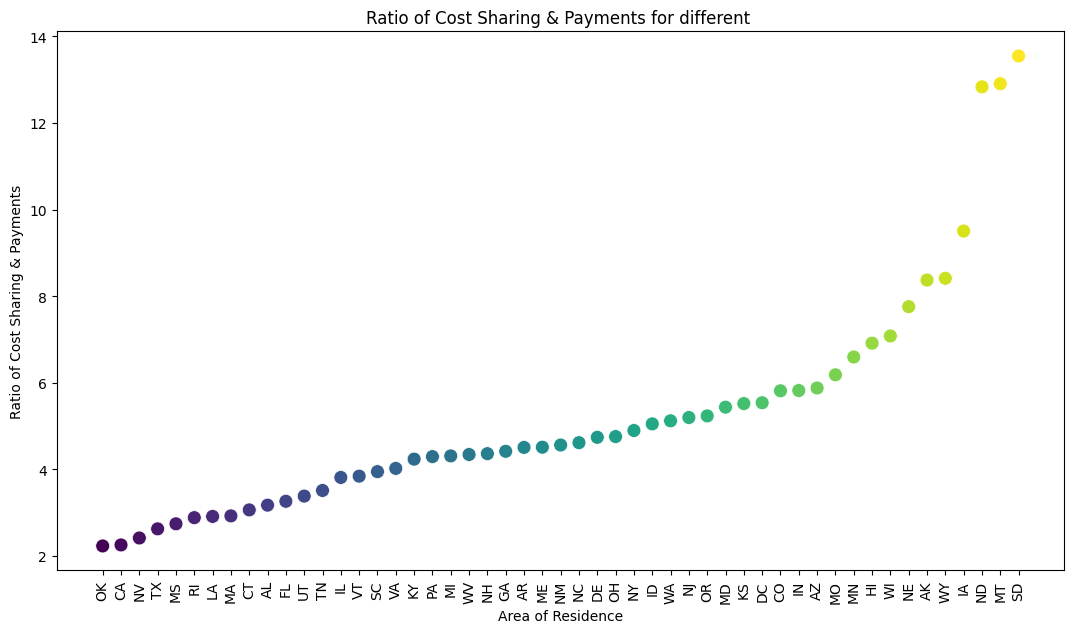

In [41]:
plt.figure(figsize=(13, 7))
scatter = sns.scatterplot(x=sorted_selected_from_merge['Area of Residence'], y=sorted_selected_from_merge['Ratio of Cost Sharing & Payments'], data=sorted_selected_from_merge, c=list(sorted_selected_from_merge.index), cmap='viridis', s=100, edgecolor='w', linewidth=0.5)

plt.xticks(rotation='vertical')

plt.xlabel('Area of Residence')
plt.ylabel('Ratio of Cost Sharing & Payments')
plt.title('Ratio of Cost Sharing & Payments for different ')

**Scatter Plot**

The scatter plot examines the relationship between cost-sharing and payments for different states, utilizing data derived from total beneficiary cost-sharing and total program payments.

In this analysis:

 **Top 5 Least Cost Sharing and Payment:**


*   State: OK, CA, NV, TX, MS.

*   These states exhibit the lowest levels of cost-sharing and payments, suggesting a relatively lower financial burden on individuals and more substantial financial support from the insurance programs.




**Top 5 Most Cost Sharing and Payment:**


*   State: SD, MT, ND, IA, WY.

*   These states demonstrate higher levels of cost-sharing and payments, indicating a potentially heavier financial burden on individuals and comparatively less coverage from insurance programs.


**Tennessee's Position:**

Tennessee ranks 13th for least cost-sharing and payment among the states.

This positioning suggests that, in comparison to other states, Tennessee experiences a moderately lower financial burden on individuals, with more robust financial support from insurance programs.



---



---



Plotting the Box Plot

**Print Median Values:**

calculated the median values for three different columns ('Total Beneficiary Cost Sharing', 'Total Program Payments', and 'Ratio of Cost Sharing & Payments').

**Creating Subplots:**

**plt.subplots(1, 2, figsize=(10, 4))** creates a figure with two subplots arranged in a single row.

**Box Plot 1:**

**sns.boxplot()** creates a box plot for the columns mentioned in the first subplot.
*axes[0].set_title()* sets the title for the first subplot.
*axes[0].set_yscale('log')* applies a logarithmic scale to the y-axis.

**Box Plot 2:**

**sns.boxplot()** creates a box plot for the column-mentioned in the second subplot.
*axes[1].set_title()* sets the title for the second subplot.
*axes[1].set_yscale('log')* applies a logarithmic scale to the y-axis.

**Global y-axis Log Scale:**

*plt.yscale('log')* applies a global logarithmic scale to the y-axis for the entire figure.

**Layout Adjustment:**

**plt.tight_layout()** adjusts the layout to prevent subplot overlap.

Total Beneficiary Cost Sharing : 918757894.0
Total Program Payments : 218425237.0
Ratio of Cost Sharing & Payments : 4.514938981073869


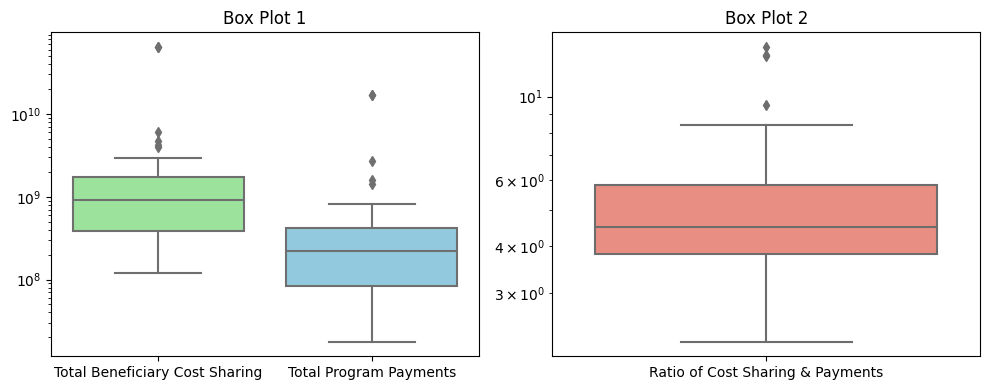

In [42]:
# Visualising the box plot to find the median and outliers.
print('Total Beneficiary Cost Sharing :', selected_from_merge.loc[:, ['Total Beneficiary Cost Sharing']].median()[0])
print('Total Program Payments :', selected_from_merge.loc[:, ['Total Program Payments']].median()[0])
print('Ratio of Cost Sharing & Payments :', selected_from_merge.loc[:, ['Ratio of Cost Sharing & Payments']].median()[0])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=selected_from_merge.loc[:, ['Total Beneficiary Cost Sharing', 'Total Program Payments']], ax=axes[0], palette=['lightgreen', 'skyblue'])

axes[0].set_title('Box Plot 1')
axes[0].set_yscale('log')

plt.yscale('log')

sns.boxplot(data=selected_from_merge.loc[:, ['Ratio of Cost Sharing & Payments']], ax=axes[1], color="salmon")

axes[1].set_title('Box Plot 2')
axes[1].set_yscale('log')

plt.tight_layout()

**The Box Plot**

The boxplot is used to gain insights into the *interquartile range (IQR)* of a dataset, particularly focusing on key metrics such as *Total Beneficiary Cost Sharing, Total Program Payments, and the Ratio of Cost Sharing & Payments.*

In this specific instance, the data reveals a median *Total Beneficiary Cost Sharing of $ 918,757,894*, *a median Total Program Payments of 218,425,237,* and a *Ratio of Cost Sharing & Payments equal to 4.51493.*

Notably, the boxplot identifies a presence of outliers, indicating instances where the median of Total Beneficiary Cost Sharing surpasses that of Total Program Payments. This observation draws attention to potential irregularities in the dataset and highlights instances where the financial burden on beneficiaries, as reflected in cost sharing, is notably higher than the corresponding program payments.


Plotting Bar Graph

**Setting Figure Size:**

*plt.figure(figsize=(20, 8))* sets the size of the figure to be created, making it 20 units wide and 8 units high.

**Excluding Specific Areas:**

*exclude_areas* is a list of areas to be excluded from the analysis.
*filtered_data* creates a new DataFrame by excluding rows where the *'Area of Residence'* is in the list of excluded areas.

**Bar Plot Creation:**

**sns.barplot()** creates a bar plot with *'Area of Residence'* on the x-axis and *'Total Program Payments'* on the y-axis. The color palette is set to *'viridis'*.

**X-axis Tick Rotation:**

*plt.xticks(rotation="vertical")* rotates the x-axis labels vertically for better readability.

**Axis Labels and Title:**

**plt.xlabel(), plt.ylabel(), and plt.title()** set labels for the x-axis, y-axis, and the title of the plot, respectively.

Text(0.5, 1.0, 'AREA vs TOTAL PROGRAM PAYMENTS')

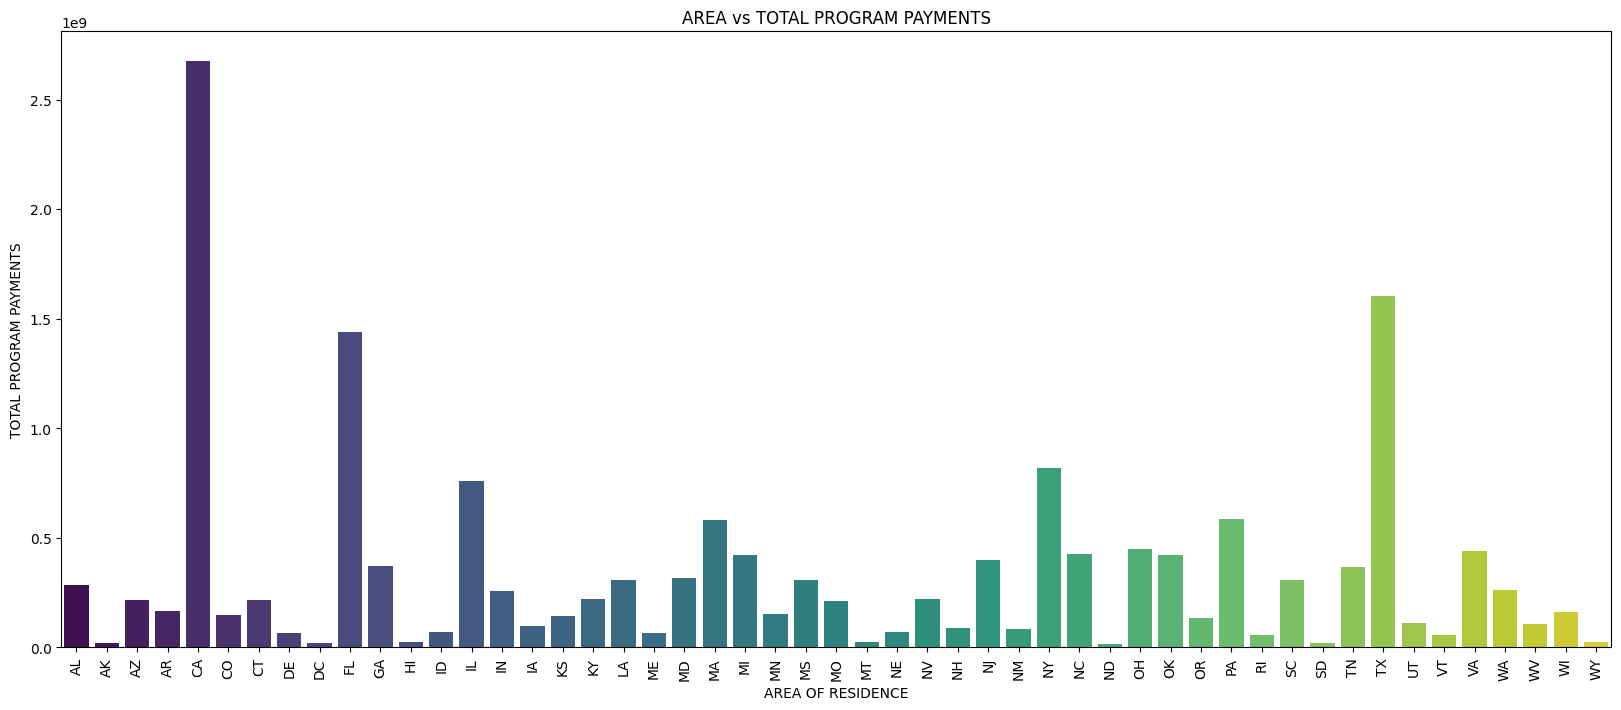

In [43]:
# Visualising through bar graph
plt.figure(figsize=(20, 8))

exclude_areas = ['All Areas', 'United States']

filtered_data = merged_data_HHA_summary[~merged_data_HHA_summary['Area of Residence'].isin(exclude_areas)]

sns.barplot(x='Area of Residence', y='Total Program Payments', data=filtered_data , palette='viridis')
plt.xticks(rotation="vertical")

plt.xlabel('AREA OF RESIDENCE')
plt.ylabel('TOTAL PROGRAM PAYMENTS')
plt.title('AREA vs TOTAL PROGRAM PAYMENTS')


**Bar Diagram**

In the bar diagram, we are examining the total program payments, representing the overall financial disbursements made by a healthcare program or insurance provider across all states in the United States.

*It is evident that total program payments are higher in CA, TX, FL,* suggesting a greater financial commitment by the healthcare program or insurance provider. This could be attributed to factors such as larger populations, increased healthcare utilization, or higher costs of medical services.

Conversely, *the payments are lower in SD, AK, DC,* indicating a comparatively lesser financial investment by the healthcare program or insurance provider. This might be influenced by factors such as a smaller population, lower healthcare utilization, or cost containment measures.

Doing a comparative analysis we can notice a slight contrast between where  total program payments states higher the cost and payment sharing are low (eg- CA, TX etc) and vice versa

In [44]:
#Finding mean and median of the enrollees.
mean_enrollees = merged_data_HHA_summary['Total Original Medicare Enrollees'].mean()
median_enrollees = merged_data_HHA_summary['Total Original Medicare Enrollees'].median()

print(f"Mean: {mean_enrollees}")
print(f"Median: {median_enrollees}")

Mean: 2032435.2075471699
Median: 518796.0


**Plotting Histogram Plot**

**Setting Figure Size:**

*plt.figure(figsize=(10, 4.5))* sets the size of the figure to be created, making it 10 units wide and 4.5 units high.

**Histogram Creation:**

**sns.histplot()** creates a histogram of the 'Total Original Medicare Enrollees'.
The *bins=30* parameter specifies the number of bins in the histogram.
The *kde=True* parameter overlays a kernel density estimate on the histogram for a smooth representation of the data distribution.
The *color='#5294ff'* parameter sets the color of the histogram.

**Title and Axis Labels:**

**plt.title()** sets the title of the plot.
**plt.xlabel()** and **plt.ylabel()** set labels for the x-axis and y-axis, respectively.

Text(0, 0.5, 'Frequency')

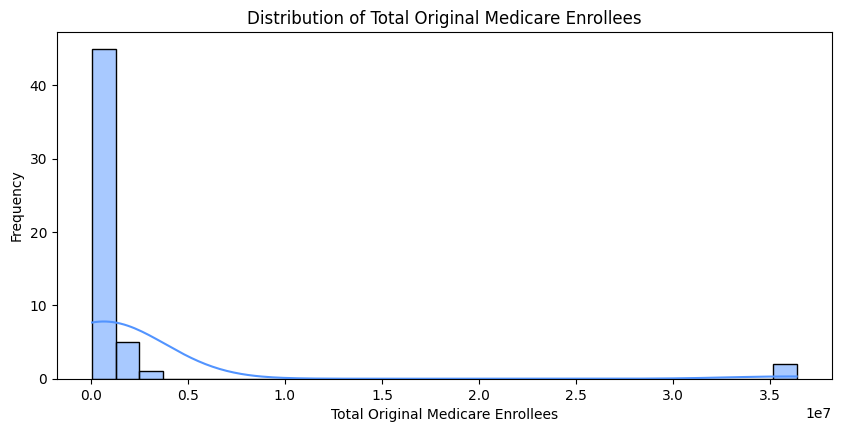

In [45]:
# Visualising through Histogram
plt.figure(figsize=(10, 4.5))
sns.histplot(merged_data_HHA_summary['Total Original Medicare Enrollees'], bins=30, kde=True, color='#5294ff')
plt.title('Distribution of Total Original Medicare Enrollees')
plt.xlabel('Total Original Medicare Enrollees')
plt.ylabel('Frequency')

**Histogram Plot**

The above histogram Plot is to show the distribution of Total Original Medicare Enrollees accross all the states and we can see that the distribution of values is more aligned to the left part and there is slight distribution at the right end. *The values on the left end will range from 1000000 to 5000000 and on the right end the values range from 3100000 to 3600000*

To get the more precise insight on the distribution of Total Medicare Enrollees you can see the **Violin Plot**

**Plotting Violin Plot**

**Setting Figure Size:**

plt.figure(figsize=(10.55, 4.5)) sets the size of the figure to be created, making it approximately 10.55 units wide and 4.5 units high.

**Violin Plot Creation:**

**sns.violinplot()** creates a violin plot for the *'Total Original Medicare Enrollees'.*
The *x parameter* specifies the variable for the x-axis, and the *color='#c9b204'* parameter sets the color of the violins.

**Title and Axis Labels:**

**plt.title()** sets the title of the plot.

**plt.xlabel()** sets the label for the x-axis.

Text(0.5, 0, 'Total Original Medicare Enrollees')

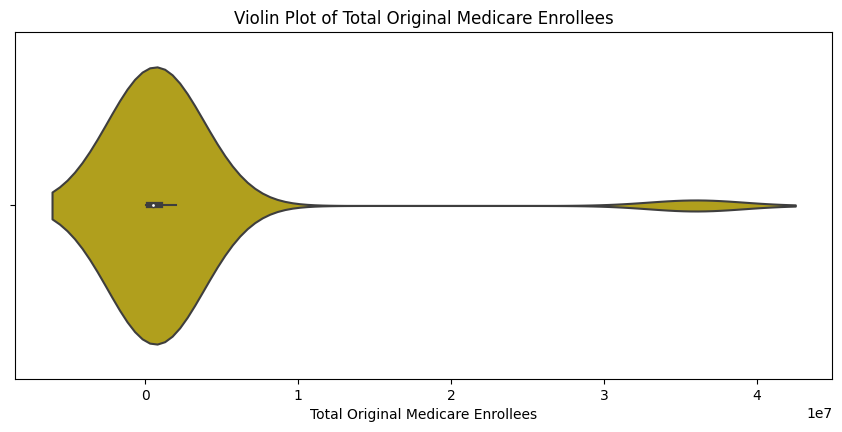

In [46]:
# Visualising through Violin plot
plt.figure(figsize=(10.55, 4.5))
sns.violinplot(x=merged_data_HHA_summary['Total Original Medicare Enrollees'], color='#c9b204')
plt.title('Violin Plot of Total Original Medicare Enrollees')
plt.xlabel('Total Original Medicare Enrollees')